# Ship Performance Analyze and Segmentation

Overview Data

Sumber data  : https://www.kaggle.com/datasets/jeleeladekunlefijabi/ship-performance-clustering-dataset

About Dataset
The Ship Performance Dataset is a synthetic yet realistic collection of data designed to represent key operational metrics and attributes of various ship types in the Gulf of Guinea. This dataset is tailored for maritime data analytics enthusiasts, machine learning practitioners, and professionals interested in exploring clustering, prediction, and optimization problems in the maritime industry.

Motivation
The maritime sector is one of the most critical components of global trade, contributing significantly to economic growth and sustainability. Understanding ship performance, fuel efficiency, and operational cost factors are essential for improving decision-making and minimizing environmental impact.

This dataset aims to provide a platform for exploring ship performance trends, identifying patterns, and solving real-world maritime challenges through data-driven approaches.

Dataset Features
The dataset consists of 2736 rows and 24 columns, with features categorized into numerical and categorical types. Below are some key highlights:

Numerical Features

- Speed_Over_Ground_knots: Average speed of the ship over water (in knots).
- Engine_Power_kW: Engine power output (in kilowatts).
- Distance_Traveled_nm: Total distance traveled by the ship (in nautical miles).
- Operational_Cost_USD: Total operational cost per voyage (in USD).
- Revenue_per_Voyage_USD: Revenue generated per voyage (in USD).
- Efficiency_nm_per_kWh: Energy efficiency calculated in nautical miles per kilowatt-hour.
  
Categorical Features

- Ship_Type: Type of ship (e.g., Tanker, Container Ship, Fish Carrier, Bulk Carrier).
- Route_Type: Shipping route type (e.g., Short-haul, Long-haul, Transoceanic).
- Engine_Type: Type of engine (e.g., Diesel, Heavy Fuel Oil).
- Maintenance_Status: Maintenance condition of the ship (e.g., Fair, Critical, Good).
- Weather_Condition: Prevailing weather conditions during voyages (e.g., Calm, Moderate, Rough).

Potential Use Cases

- Exploratory Data Analysis (EDA): Identify trends and patterns in ship performance and operational efficiency.
- Clustering Analysis: Segment ships based on performance metrics and categorical attributes.
- Optimization: Analyze trade-offs between operational costs and revenue to improve profitability.

Acknowledgment

This dataset was synthetically generated and curated to resemble real-world ship performance data. While it reflects realistic maritime scenarios, it is not sourced from actual shipping companies or vessels.

License
This dataset is shared under the CC BY 4.0 License, allowing for reuse and adaptation with proper attribution.

## Data Wrangling

In [29]:
import pandas as pd
from scipy.stats import mode

In [30]:
df = pd.read_csv('Ship_Performance_Dataset.csv')
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [32]:
df.dropna(inplace= True)
df.isna().sum()

Date                       0
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Speed_Over_Ground_knots,2127.0,17.606620,4.358035,10.009756,13.901849,17.709557,21.317888,24.991661
Engine_Power_kW,2127.0,1750.937650,714.510707,501.739027,1140.312110,1755.420863,2364.977047,2998.734329
Distance_Traveled_nm,2127.0,1038.979949,566.964336,50.433150,559.500880,1037.646044,1541.193201,1998.337057
Draft_meters,2127.0,9.961135,2.843848,5.001947,7.475897,10.001622,12.393851,14.989905
Cargo_Weight_tons,2127.0,1033.466859,557.643284,50.229624,557.071885,1045.366596,1526.149743,1999.126697
Operational_Cost_USD,2127.0,257042.246655,140640.549548,10097.439656,133864.243330,259124.728516,384452.537643,499734.867868
Revenue_per_Voyage_USD,2127.0,523427.583448,269842.456183,50351.814447,292183.911075,524083.139296,752933.741950,999811.927756
Turnaround_Time_hours,2127.0,41.773758,17.641702,12.019909,26.312659,41.533238,57.558671,71.972415
Efficiency_nm_per_kWh,2127.0,0.789907,0.403117,0.100211,0.455310,0.774962,1.136306,1.498191
Seasonal_Impact_Score,2127.0,1.001564,0.289193,0.500004,0.752892,1.007639,1.250343,1.499224


## Clustering

Preprocessing

In [35]:
df['PWR'] = df['Engine_Power_kW'] / df['Cargo_Weight_tons']
df['PWR'].describe()

count    2127.000000
mean        3.252261
std         5.095453
min         0.269939
25%         1.027512
50%         1.675490
75%         3.178739
max        57.058357
Name: PWR, dtype: float64

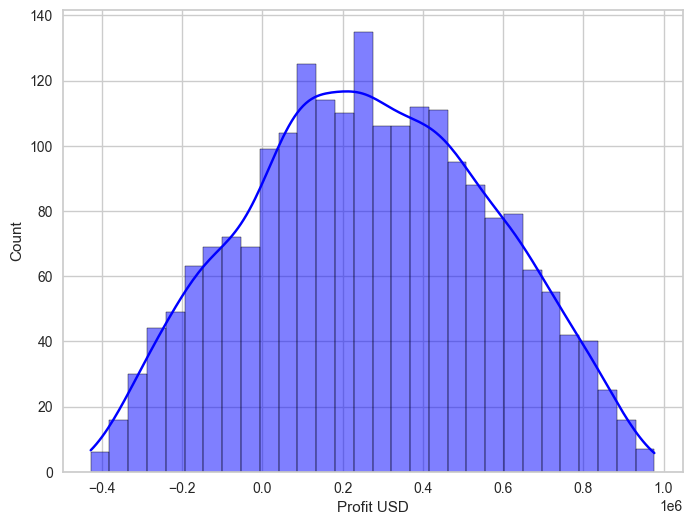

In [36]:
# Profit Coloumn
df['Profit USD'] = df['Revenue_per_Voyage_USD'] - df['Operational_Cost_USD']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(
    df['Profit USD'],
    kde= True,
    bins= 30,
    color= 'blue'
)
plt.show()

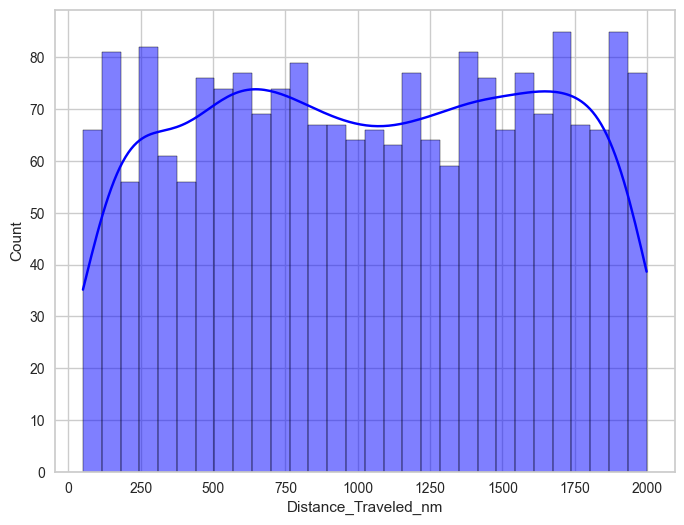

In [37]:
plt.figure(figsize=(8,6))
sns.histplot(
    df['Distance_Traveled_nm'],
    kde= True,
    bins= 30,
    color= 'blue'
)
plt.show()

In [38]:
def distance_traveled_grouping(nm):
    if nm <= 750:
        return 'Short'
    elif nm <=1500:
        return 'Middle'
    else:
        return 'Long'

df['distance_traveled_grouping'] = df['Distance_Traveled_nm'].apply(distance_traveled_grouping)

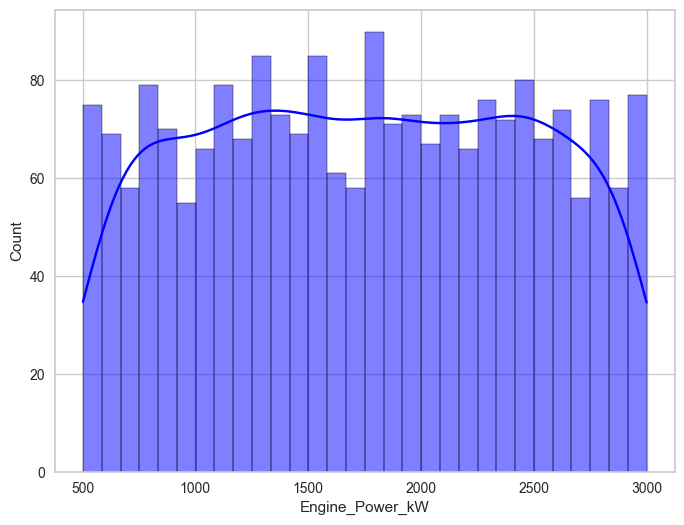

In [39]:
plt.figure(figsize=(8,6))
sns.histplot(
    df['Engine_Power_kW'],
    kde= True,
    bins= 30,
    color= 'blue'
)
plt.show()

In [40]:
def engine_power_grouping(power):
    if power <= 1250:
        return "Low"
    elif power <=2250:
        return "Middle"
    else:
        return "High"

df['engine_power_grouping'] = df['Engine_Power_kW'].apply(engine_power_grouping)

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Ship_Type encoded'] = le.fit_transform(df['Ship_Type'])
df['Route_Type encoded'] = le.fit_transform(df['Route_Type'])
df['Engine_Type encoded'] = le.fit_transform(df['Engine_Type'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 1 to 2735
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        2127 non-null   object 
 1   Ship_Type                   2127 non-null   object 
 2   Route_Type                  2127 non-null   object 
 3   Engine_Type                 2127 non-null   object 
 4   Maintenance_Status          2127 non-null   object 
 5   Speed_Over_Ground_knots     2127 non-null   float64
 6   Engine_Power_kW             2127 non-null   float64
 7   Distance_Traveled_nm        2127 non-null   float64
 8   Draft_meters                2127 non-null   float64
 9   Weather_Condition           2127 non-null   object 
 10  Cargo_Weight_tons           2127 non-null   float64
 11  Operational_Cost_USD        2127 non-null   float64
 12  Revenue_per_Voyage_USD      2127 non-null   float64
 13  Turnaround_Time_hours       2127 non-n

Segementation for Route Optimizer

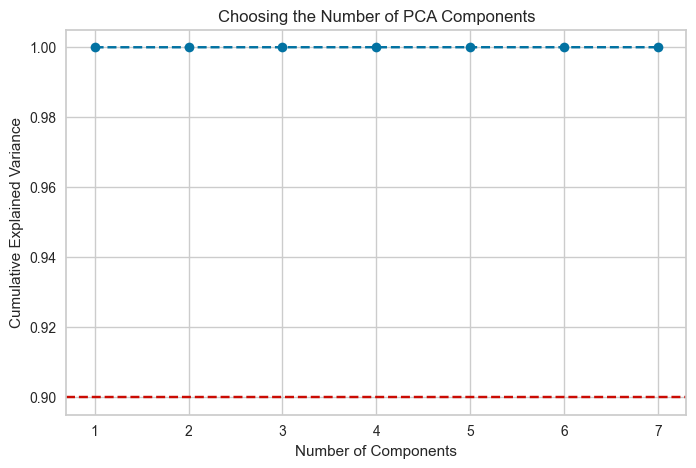

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

scaler = StandardScaler()
pca = PCA()


route_number_col = [
'Profit USD', 'Cargo_Weight_tons', 'Engine_Power_kW', 'Distance_Traveled_nm',
'Average_Load_Percentage'
]
route_kategori_col = [
        'Route_Type encoded', 'Engine_Type encoded', 
]

pca.fit_transform(df[route_kategori_col + route_number_col])

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing the Number of PCA Components')
plt.axhline(y=0.90, color='r', linestyle='--')  
plt.grid(True)
plt.show()

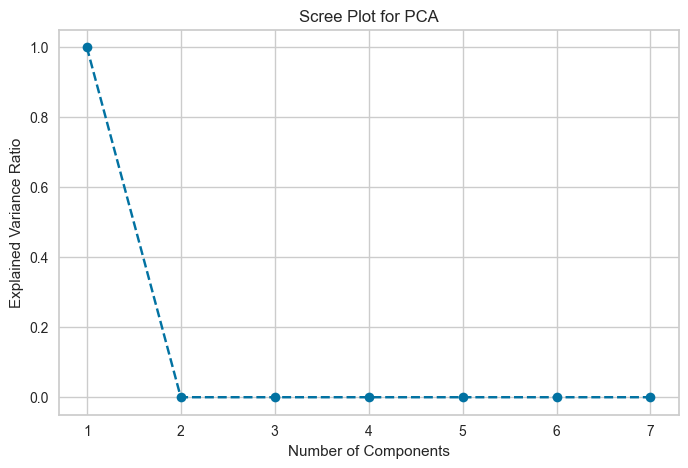

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.grid(True)
plt.show()

In [44]:
pca = PCA(n_components=2)
x = pca.fit_transform(df[route_kategori_col + route_number_col])


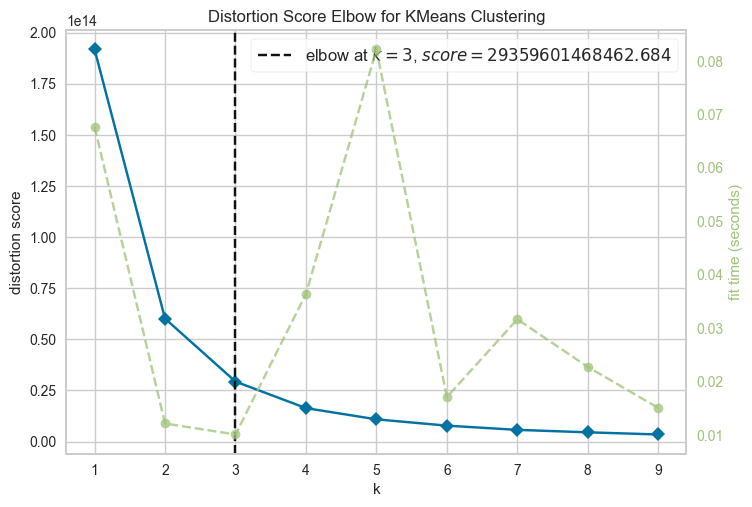

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

visulizer = KElbowVisualizer(KMeans(), k=(1,10))
visulizer.fit(x)
visulizer.show()

Model

In [46]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# kmeans
kmeans = KMeans(n_clusters= 3 , random_state= 42)
kmeans_label =kmeans.fit_predict(x)
silhouette_kmeans = silhouette_score(x,kmeans_label )

#AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_label =agglo.fit_predict(x)
silhouette_agglo = silhouette_score(x, agglo_label)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples= 3)
dbscan_label=dbscan.fit_predict(x)
if len(set(dbscan.labels_)) > 1:
    silhouette_dbscan = silhouette_score(x, dbscan_label)
else:
    silhouette_dbscan = np.nan

# GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_label=gmm.fit_predict(x)
silhouette_gmm = silhouette_score(x, gmm_label)

print("silhouette score KMeans:", silhouette_kmeans)
print("silhouette score Agglomerative:", silhouette_agglo)
print("silhouette score DBSCAN:",silhouette_dbscan )
print("silhouette score GMM:", silhouette_gmm)


silhouette score KMeans: 0.5454292983900048
silhouette score Agglomerative: 0.501058206122797
silhouette score DBSCAN: nan
silhouette score GMM: 0.5377065343779646


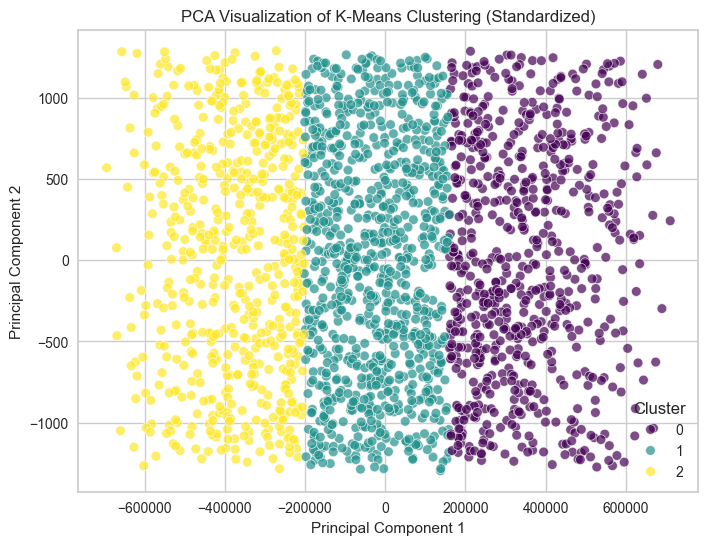

In [47]:
from sklearn.preprocessing import StandardScaler


# Lanjutkan ke PCA
pca = PCA(n_components=2)
x = pca.fit_transform(x)

# Visualisasi ulang
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=kmeans_label, palette="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of K-Means Clustering (Standardized)")
plt.legend(title="Cluster")
plt.show()


In [48]:
df_summary = df.copy()
df_summary['Cluster'] = kmeans_label

In [49]:
feature_map = {
    'Profit USD' : 'mean',
    'Distance_Traveled_nm' : 'mean',
    'Engine_Power_kW' : 'mean',
    'Cargo_Weight_tons' : 'mean',
    'Average_Load_Percentage' : 'mean',
    'Efficiency_nm_per_kWh' : 'mean',
    'Turnaround_Time_hours' : 'mean',
    'Weekly_Voyage_Count' : 'mean',
    'Efficiency_nm_per_kWh' : 'mean',
}

In [50]:
summary = df_summary.groupby('Cluster').agg(feature_map)
summary.T

Cluster,0,1,2
Profit USD,613591.958301,240092.682726,-109786.136595
Distance_Traveled_nm,1097.813085,1001.961656,1026.129424
Engine_Power_kW,1751.347073,1743.020869,1762.818215
Cargo_Weight_tons,1021.704538,1071.656558,987.918385
Average_Load_Percentage,76.002771,74.666248,74.796819
Efficiency_nm_per_kWh,0.790244,0.796631,0.778995
Turnaround_Time_hours,41.531913,41.499697,42.492713
Weekly_Voyage_Count,5.033873,4.804077,4.911504


### **Ringkasan Analisis Cluster Performa Kapal**  

Segmentasi menunjukkan **Cluster 0 dan 1 menghasilkan profit**, dengan **Cluster 0 paling efisien**, sedangkan **Cluster 1 sebagai batas bawah profitabilitas**, meskipun sebagian kapal mengalami kerugian. **Cluster 2 mengalami kerugian** akibat:  
1. **Bobot muatan rendah**, menyebabkan efisiensi operasional menurun.  
2. **Efisiensi energi buruk**, meningkatkan biaya bahan bakar.  
3. **Durasi berlabuh lama**, memperbesar biaya operasional jika tidak ada tambahan logistik.  

### **Strategi Optimalisasi Cluster 2:**  
- **Meningkatkan utilisasi muatan** untuk efisiensi maksimal.  
- **Optimalisasi bahan bakar dan rute** guna menekan biaya energi.  
- **Mengurangi waktu idle di pelabuhan** untuk menghindari pembengkakan biaya.  
- **Menyesuaikan pola operasional** dengan Cluster 1 sebagai batas aman profitabilitas.  

Dengan strategi ini, Cluster 2 dapat mengurangi kerugian dan mendekati standar profitabilitas yang dicapai oleh Cluster 0 dan 1.

---

In [51]:
cluster0 = df_summary.copy()  # Filter cluster 0 dan buat salinan
cluster0 = cluster0.groupby(['Route_Type','Ship_Type', 'Engine_Type']).agg(feature_map)  # Agregasi
cluster0 = cluster0.sort_values(['Route_Type','Ship_Type', 'Profit USD'], ascending=[False, False, False])  # Urutkan
cluster0


Profit USD  \
Route_Type   Ship_Type      Engine_Type                           
Transoceanic Tanker         Diesel                302356.776545   
                            Heavy Fuel Oil (HFO)  282971.524139   
                            Steam Turbine         233789.499313   
             Fish Carrier   Diesel                280126.241139   
                            Heavy Fuel Oil (HFO)  263253.942000   
                            Steam Turbine         236679.487575   
             Container Ship Heavy Fuel Oil (HFO)  308091.348962   
                            Steam Turbine         230450.994203   
                            Diesel                220342.437843   
             Bulk Carrier   Steam Turbine         265401.291342   
                            Heavy Fuel Oil (HFO)  253136.191964   
                            Diesel                238898.986910   
Short-haul   Tanker         Heavy Fuel Oil (HFO)  295029.034559   
                            Diesel                255949.074677   
                            Steam Turbine         233955.712685   
             Fish Carrier   Diesel                274770.844004   
                            Steam Turbine         223307.523226   
                            Heavy Fuel Oil (HFO)  208042.864750   
             Container Ship Diesel                327983.926899   
                            Heavy Fuel Oil (HFO)  301375.473015   
                            Steam Turbine         289650.486987   
             Bulk Carrier   Diesel                333855.188800   
                            Steam Turbine         254460.995418   
                            Heavy Fuel Oil (HFO)  249788.502449   
Long-haul    Tanker         Heavy Fuel Oil (HFO)  287764.807825   
                            Steam Turbine         281544.707169   
                            Diesel                209967.387264   
             Fish Carrier   Diesel                318444.239501   
                            Heavy Fuel Oil (HFO)  314730.435956   
                            Steam Turbine         268189.395608   
             Container Ship Steam Turbine         342220.966073   
                            Diesel                203029.502979   
                            Heavy Fuel Oil (HFO)  187652.957082   
             Bulk Carrier   Diesel                307138.364456   
                            Steam Turbine         299376.748745   
                            Heavy Fuel Oil (HFO)  295676.124966   
Coastal      Tanker         Steam Turbine         293996.311463   
                            Diesel                254974.934602   
                            Heavy Fuel Oil (HFO)  181328.716183   
             Fish Carrier   Diesel                323894.713703   
                            Steam Turbine         304390.327945   
                            Heavy Fuel Oil (HFO)  295376.861290   
             Container Ship Steam Turbine         284769.886071   
                            Diesel                272287.543450   
                            Heavy Fuel Oil (HFO)  239068.292753   
             Bulk Carrier   Diesel                274962.924093   
                            Heavy Fuel Oil (HFO)  243773.561239   
                            Steam Turbine         195803.283386   

                                                  Distance_Traveled_nm  \
Route_Type   Ship_Type      Engine_Type                                  
Transoceanic Tanker         Diesel                         1042.125404   
                            Heavy Fuel Oil (HFO)           1075.324021   
                            Steam Turbine                   974.362964   
             Fish Carrier   Diesel                          977.651012   
                            Heavy Fuel Oil (HFO)           1042.363928   
                            Steam Turbine                   900.638214   
             Container Ship Heavy Fuel Oil (HFO)           1039.277870   
                            Steam Tu

Berikut rekomendasi jenis mesin kapal berdasarkan rute dan jenis kapal dengan mempertimbangkan efisiensi bahan bakar, profitabilitas, dan efektivitas operasional:  

---

### **1. Rute Transoceanic (Lintas Samudra)**
- **Tanker**: **Heavy Fuel Oil (HFO)**  
  🔹 **Alasan**: Efisiensi tinggi pada perjalanan jarak jauh, biaya bahan bakar lebih rendah dibanding diesel, dan lebih stabil dalam konsumsi energi.  
- **Fish Carrier**: **Steam Turbine**  
  🔹 **Alasan**: Performa baik dalam beban tinggi dan perjalanan jauh, serta stabilitas tinggi.  
- **Container Ship**: **Heavy Fuel Oil (HFO)**  
  🔹 **Alasan**: Efisiensi nm/kWh tertinggi, memungkinkan biaya operasional lebih rendah.  
- **Bulk Carrier**: **Steam Turbine**  
  🔹 **Alasan**: Efisiensi bahan bakar lebih tinggi pada beban berat dan rute panjang.  

---

### **2. Rute Short-haul (Pendek)**
- **Tanker**: **Diesel**  
  🔹 **Alasan**: Respons cepat dan efisiensi tinggi untuk perjalanan yang lebih sering dan pendek.  
- **Fish Carrier**: **Heavy Fuel Oil (HFO)**  
  🔹 **Alasan**: Konsumsi bahan bakar lebih stabil dan biaya lebih rendah untuk beban berat di perjalanan pendek.  
- **Container Ship**: **Diesel**  
  🔹 **Alasan**: Efisiensi tinggi untuk perjalanan jarak pendek dengan turnaround time cepat.  
- **Bulk Carrier**: **Diesel**  
  🔹 **Alasan**: Efisiensi bahan bakar terbaik untuk rute pendek dengan fleksibilitas operasional tinggi.  

---

### **3. Rute Long-haul (Menengah – Jauh)**
- **Tanker**: **Heavy Fuel Oil (HFO)**  
  🔹 **Alasan**: Menghasilkan profit tinggi dengan konsumsi bahan bakar yang lebih stabil untuk perjalanan jauh.  
- **Fish Carrier**: **Diesel**  
  🔹 **Alasan**: Fleksibilitas lebih baik dibanding Steam Turbine untuk manuver di berbagai rute dan kondisi cuaca.  
- **Container Ship**: **Heavy Fuel Oil (HFO)**  
  🔹 **Alasan**: Biaya bahan bakar lebih rendah dibanding diesel dan lebih optimal untuk pengangkutan kontainer dalam jumlah besar.  
- **Bulk Carrier**: **Steam Turbine**  
  🔹 **Alasan**: Efisiensi nm/kWh tinggi pada perjalanan menengah dan jauh dengan beban besar.  

---

### **Kesimpulan Strategi Operasional**
- **Untuk rute jarak jauh (Transoceanic & Long-haul)**, **Heavy Fuel Oil (HFO) dan Steam Turbine** direkomendasikan karena konsumsi bahan bakar lebih stabil dan ekonomis.  
- **Untuk rute pendek (Short-haul)**, **Diesel** lebih baik karena fleksibilitas lebih tinggi dan waktu respons lebih cepat.  
- **Container ship dan bulk carrier** lebih cocok dengan **HFO atau Steam Turbine**, sementara **fish carrier dan tanker** memiliki fleksibilitas lebih besar dengan **Diesel atau HFO**, tergantung jarak tempuh.  

Strategi ini dapat meningkatkan profitabilitas dengan **mengoptimalkan efisiensi bahan bakar, mengurangi turnaround time, dan menyesuaikan mesin dengan kebutuhan operasional setiap rute**. 🚢📈

In [52]:
df_summary.to_csv("Ship Performance.csv", index= False)

In [53]:
df_summary['Route_Type'].value_counts()

Route_Type
Long-haul       566
Coastal         533
Transoceanic    515
Short-haul      513
Name: count, dtype: int64

In [54]:
df_summary['Ship_Type'].value_counts()

Ship_Type
Bulk Carrier      550
Tanker            532
Container Ship    524
Fish Carrier      521
Name: count, dtype: int64